### Исследование игр

**Название проекта**

Поиск закономерностей определяющих успешность игры
_____
**Описание исследования.**

Мы проанализируем датасет с продажами игр по регионам. Для этого мы выполним предобработку даннных, чтобы отчистить таблицу от дубликатов и лишних данных, так же проанализируем пропуски. После проведем исследовательский анализ данных, более детально рассмотрим суммы продаж игр в разрезе года, жанра и региона. Составиим портрет пользователя каждого региона, чтобы определить популярные жанры и категории игр. На следующем этапе проверим несколько гипотез и после Вас будет ждать общий вывод по всему исследованию.
_____
**Цель исследования.**
    
Провести анализ продаж игр, чтобы определить потенциально выгодные продукты.
   
_____
**Задачи исследования.**

Определить факторы, которые влияют на успешность продаж.
_____
**Исходные данные.**
    
В нашем распоряжении датасет с 1980 по 2016 год.
______

**Данное исследование разделим на несколько частей.**

* [Откроем файл с данными и изучим общую информацию.](#id1)
* [Предобработка данных](#id2)
* [Исследовательский анализ данных](#id3)
* [Портрет пользователя каждого региона](#id4)
* [Проверка гипотез](#id5)
* [Вывод](#id6)

# Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
data=pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сразу приведем колонки к нижнему регистру для удобства.

In [3]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим типы данных в таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Не все колонки имеют правильный тип данных, а именно год релиза, оценка пользователей. На следующем этапе исправим это.

Предварительно построим графики по числовым колонкам и расчитаем ключевые показатели.

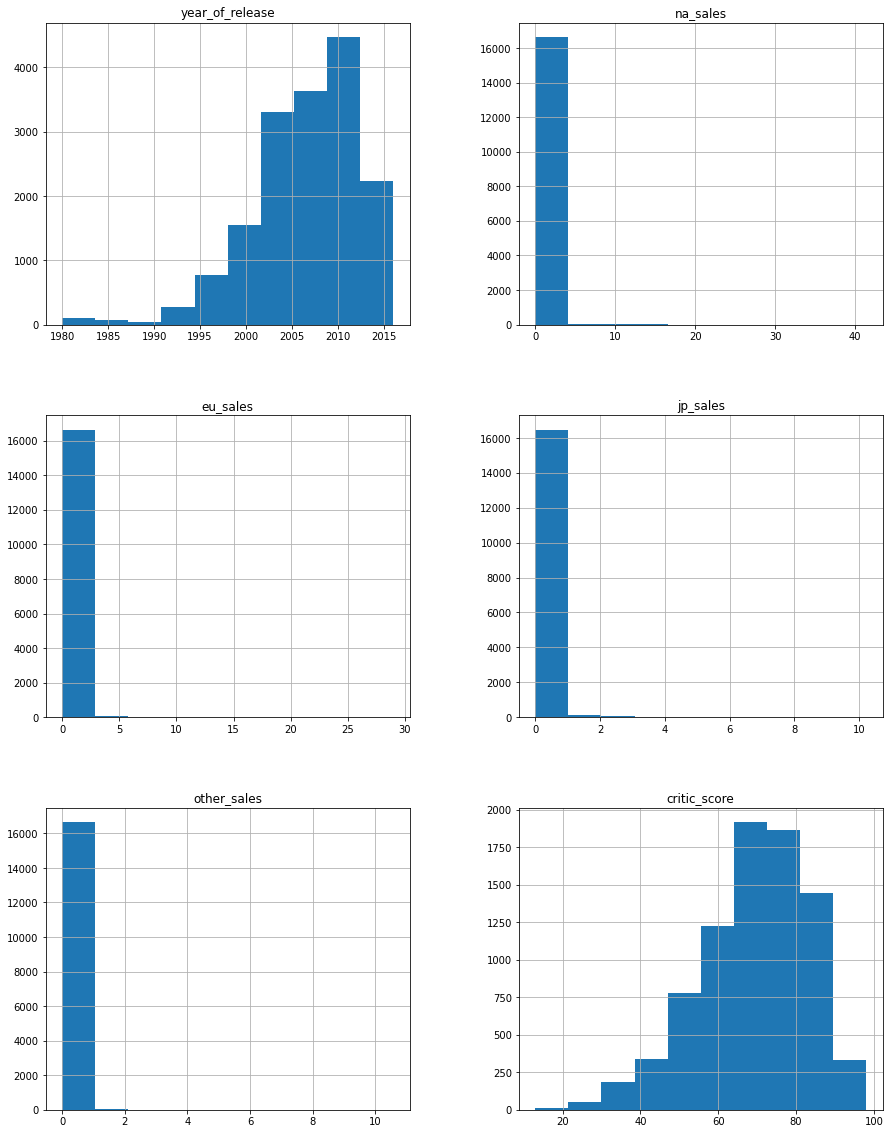

In [5]:
data.hist(figsize=(15, 20));

In [6]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Данные у нас собраны с 1980 по 2016 года, наибольший рынок продаж занимает Северная Америка и далее по списку в порядке убывания. Минимальная оценка критиков 13, максимум 98. 

Рассмотрим количесво пропусков и их процент. 

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как мы видим у нас 2 пропуска в имени, 269 пропусков года релиза, что составляет менее 2%. Обработаем эти данные на следующем этапе. Очень много пропусков в оценках критиков и игроков, так же есть пропуски в возрастных группах.

В данных есть несколько недоработок, а именно неправильные форматы колонок, много пропусков в важных данных. Выявленные небоработки вызваны старостью данных. Так же повлияло, что игры вывпускались разными странами и где-то были эксперты по играм, а где-то нет. Возрастной рейтинг давала американская компания ESRB, поэтому возрастной рейтинг присваивался не всем играм.

Займемся предобработкой данных.

### Предобработка данных <a id='id2'></a>

Посмотрим есть ли дубликаты. Проверим их по идентичности двух колонок: наименованию и платформы.

In [9]:
data.duplicated(subset=['name', 'platform']).sum()

5

Найдено пять дубликатов, избавимся от них.

In [10]:
data = data.drop_duplicates(subset=['name', 'platform'])

Займемся пропусками в таблице. Начнем с первой колонки. В ней было 2 пропуска, рассмотрим их подробнее.

In [11]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Остался только один пропуск, значит второй был дубликатом. Год выпуска игры 1993. Довольно много времени прошло с ее релиза. Так же в этой строке не указан жанр и оценки критиков, игроков и возрастная категория. Скорее всего пропуск был вызван старостью игры и не все данные заполняли, либо в процессе скачивания данных были ошибки. От удаления этой строки мы ничего не потеряем, у нее много пропусков, если бы таких колонок было много, можно было их заменить на 'unknown' и оставить, чтобы не терять данные. Отмечу, что для игровой индустрии 20 лет это очень большой промежуток, поэтому данная строка неактуальна для анализа и определения стратегии на 2017 год.

In [12]:
data = data.dropna(subset=['name'])

В колонке с платформой пропусков нет, посмотрим на каких платформах выпускали игры и есть ли там неявные дубликаты.

In [13]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

С этой колонкой все хорошо: неявных дубликатов нет.

Теперь рассмотрим колонку с датой.

In [14]:
data.loc[data['year_of_release'].isna()].tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.0,45.0,2,M
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.0,NaN,NaN,NaN
15966,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.00,0.0,50.0,tbd,T
15998,Jet Impulse,DS,NaN,Simulation,0.00,0.00,0.02,0.0,NaN,NaN,NaN
16017,Dream Dancer,DS,NaN,Misc,0.01,0.00,0.00,0.0,NaN,tbd,E
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16080,Ferrari: The Race Experience,Wii,NaN,Racing,0.00,0.01,0.00,0.0,54.0,NaN,E
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.0,26.0,2.7,T
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.0,65.0,NaN,RP


Как мы видим, в строках заполнены остальные графы, поэтому не хочется удалять эти строки, они могут повлиять на исследование. Возьмем игру и посмотрим выпускалась ли она на других платформах с указанием даты.

In [15]:
data.loc[data['name']=='LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Как видно пропуски в годах появились просто изза невнимательности, их можно обработать. Сделаем цикл который проходится по названиям, ищет пустые строки в годах и меняет их на медиану года выпуска игры, если игра выпускалась на нескольких платформах. И посмотрим заполнение на примере игры LEGO Batman: The Videogame. С другой стороны, таких пропусков немного, они составляют всего 2% от всего датасета, отметим, что года не указаны на устаревающих платформах, по крайней мере в первых 20 и последних 20 практически все платформы старые. Из новых там только PC, который обновляется не типичным для игровых консолей образом. Удаление таких строк не повлияет на наше исследование.

In [16]:
#for t in data['name'].unique(): #цикл долгий, но ничего лучше я не придумал
    #data.loc[(data['name'] == t) & (data['year_of_release'].isna()), 'year_of_release'] = \
    #data.loc[(data['name'] == t), 'year_of_release'].median()

In [17]:
#data.loc[data['name']=='LEGO Batman: The Videogame']

В итоге решил отказаться от цикла и замены значений, но код сохранил на всякий случай, поэтому заккоментил его.

В данной игре года заполнились корректно, посмотрим остались ли пропуски.

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски все равно остались, удалим их. А потом приведем колонку к целочисленному типу.

In [19]:
data=data.dropna(subset = ['year_of_release'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int')

Посмотрим колонку жанр на дубликаты.

In [21]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

В этой колонке все хорошо. 

Колонки с продажами трогать не будем, перейдем к колонкам с оценками.

In [22]:
data.loc[data['critic_score'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Во многих строках с пропусками оценок критиков, отсутствуют и оценки пользователей и рейтинг.
Скорее всего пользователи и критики оценивали игры не на всех платформах, потому что посчитали это бессмысленным. Так же повлиял год, большинство игр достаточно старые и в те годы не так была развита игровая индустрия. Возрастной рейтинг оценивает американская компания, которая скорее пропускает многие Японские игры, если не все.

Посмотрим какие уникальные значения оценок и рейтинга.

In [23]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [24]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [25]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Оценки критиков имеют соответствующий формат и заполнены числами. Так же там есть пустые значения, мы их не сможем заполнить, так как нам невозможно предугадать оценки критиков. С оценками пользователей тоже самое, но есть специфочное значение 'tbd', которое означает неизвестная оценка. Заменим его на nan. В возрастном рейтинге так же есть пустые значения, но мы не сможем их оценить, так как не сможем дать экспертную оценку играм.

In [26]:
data['user_score'] = data['user_score'].replace('tbd', None)

In [27]:
data['user_score'] = data['user_score'].astype(float)

Добавим в таблицу столбец с итоговой суммой продажи

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Мы обработали данные, привели колонки к подходящему типу данных, заполнили пропуски по возможности, удалили неподходящие данные. Теперь перейдем к исследовательскому анализу данных.

### Исследовательский анализ данных  <a id='id3'></a>

Для начала посмотрим сколько игр выпускалось в разные годы.

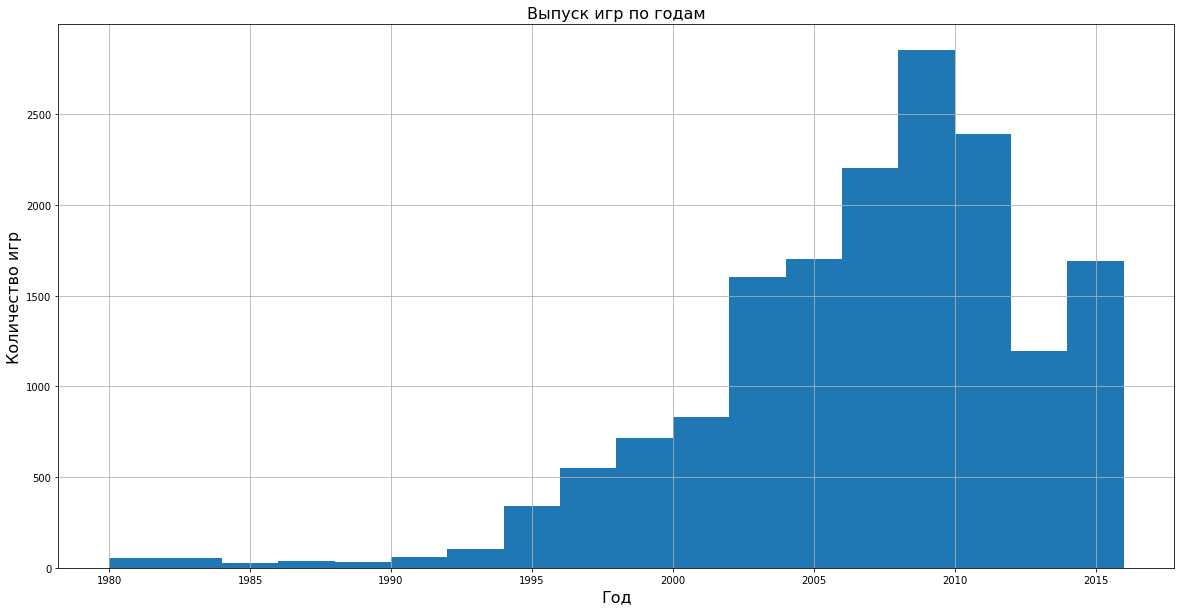

In [29]:
data['year_of_release'].hist(bins=18, figsize=(20,10))
plt.title('Выпуск игр по годам', fontsize = 16)
plt.ylabel('Количество игр', fontsize = 16) 
plt.xlabel('Год', fontsize = 16) 
plt.show()

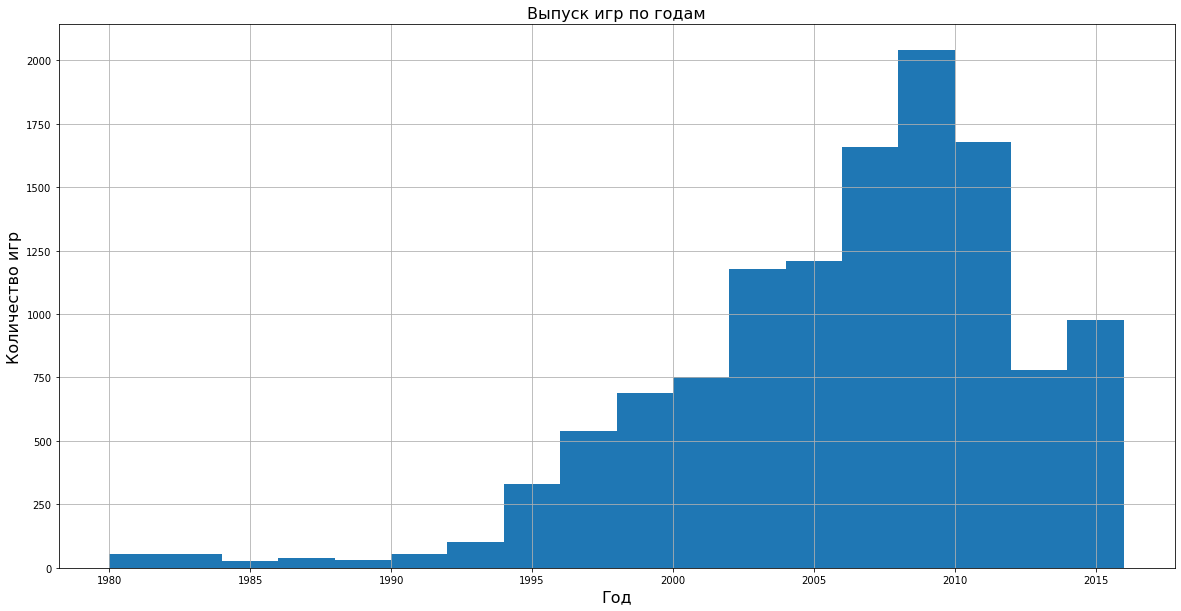

In [30]:
df32 = data[['name', 'year_of_release']].copy().drop_duplicates()
df32.hist(bins=18, figsize=(20,10))
plt.title('Выпуск игр по годам', fontsize = 16)
plt.ylabel('Количество игр', fontsize = 16) 
plt.xlabel('Год', fontsize = 16) 
plt.show()

Как мы видим, продажи по-немногу росли каждый год, с небольшими просадками. Пик продаж приходится на 2009-2010 год, потом последовал резкий спад и небольшой подъем. Скорее всего, спад вызван кризисом 2008 года. Тогда прошла большая волна банкротств, и не все организации пережили это.

Посмотрим продажи по всем платформам.

In [31]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     959.99
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.68
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

За все время наибольшее количество продаж было на PS2, на втором месте X360, на третьем PS3. Эти платформы наиболее популярны, но скорее всего уже неактуальны, рассмотрим на каких платформах еще выпускают игры, а какие уже неактуальны.

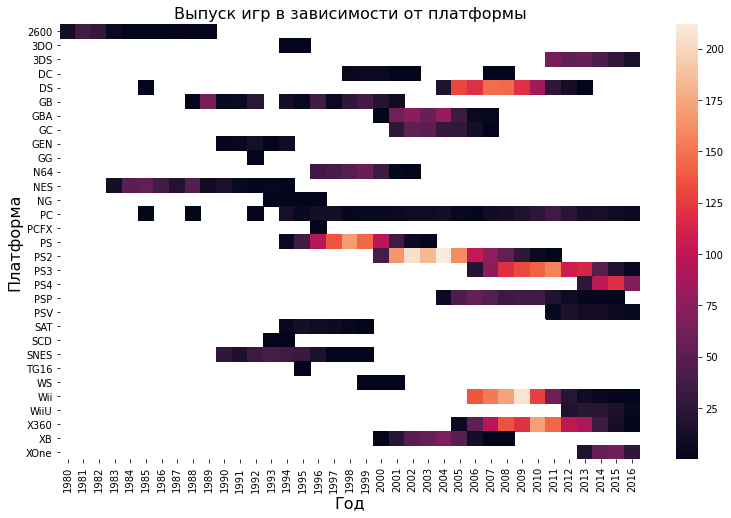

In [32]:
plt.figure(figsize = (13,8))
sns.heatmap(data.pivot_table(
        index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))

plt.title('Выпуск игр в зависимости от платформы', fontsize = 16)
plt.ylabel('Платформа', fontsize = 16) 
plt.xlabel('Год', fontsize = 16) 
plt.show()

Как мы видим в игровой индустрии спад последние годы, до 2016 года дожило не очень много платформ, а некоторые платформы прошли свои пики популярости. В среднем же платформы популярны в течении 10 лет. Набирает обороты PS4, XOne так же вышел относительно недавно, но все таки уступает в продажах PS4. 

Отфильтруем датасет, оставив данные с 2009 года. Так мы увидим только популярные платформы.

In [33]:
df = data.loc[data['year_of_release']>2013]

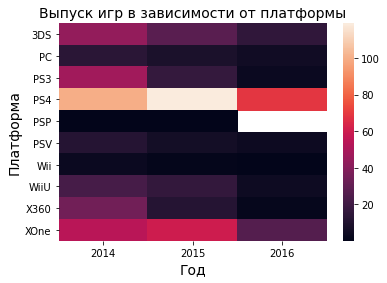

In [34]:
sns.heatmap(df.pivot_table(
    index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))

plt.title('Выпуск игр в зависимости от платформы', fontsize = 14)
plt.ylabel('Платформа', fontsize = 14) 
plt.xlabel('Год', fontsize = 14) 
plt.show()

Как мы видим, 3DS, PS3, PSV, Wii, X360 прошли пики своей популярности и значительно сбавили обороты. PS4, XOne все еще на пике популярности, так же неизменно стабилен PC. На эти три платформы стоит сделать особоенный упор. 

Построим боксплоты по глобальным продажам игр.

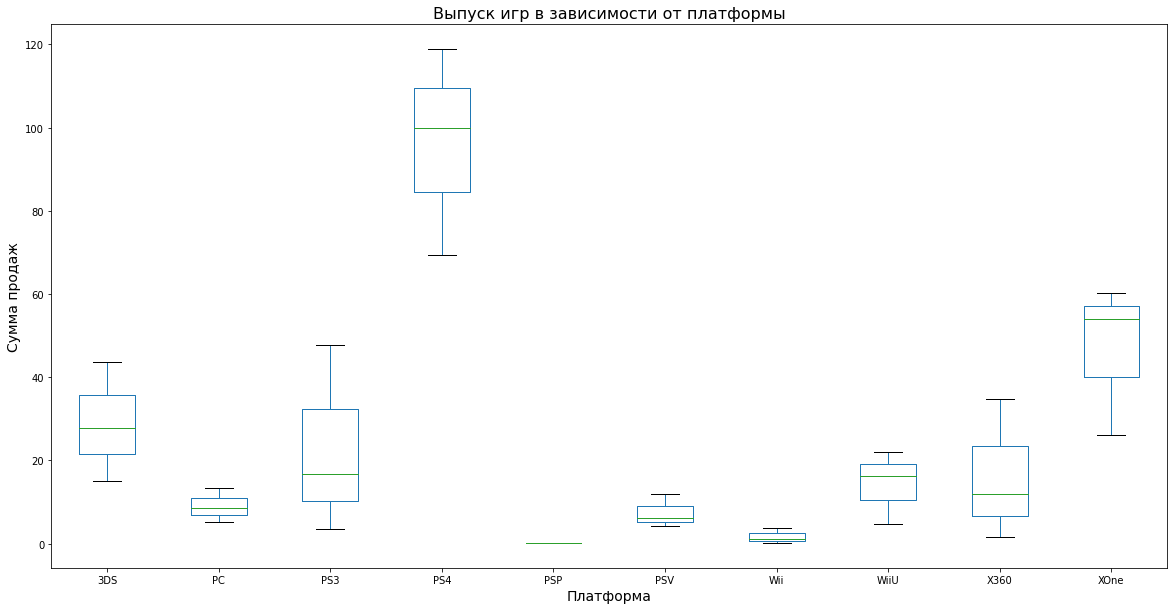

In [35]:
df.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
).plot(kind='box', figsize=[20, 10]
      )
plt.title('Выпуск игр в зависимости от платформы', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Платформа', fontsize = 14) 
plt.show()

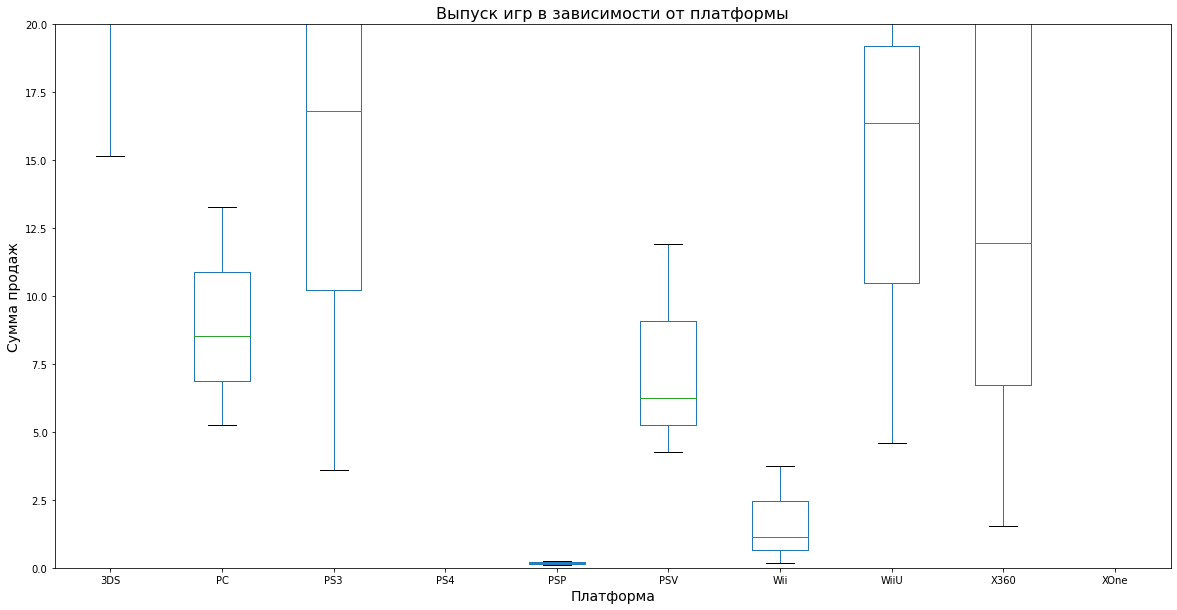

In [36]:
df.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
).plot(kind='box', ylim=(0,20), figsize=[20, 10]
      )
plt.title('Выпуск игр в зависимости от платформы', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Платформа', fontsize = 14) 
plt.show()

In [37]:
df.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
).describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.180000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.084853,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.120000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.150000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.180000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.210000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.240000,11.900000,3.750000,22.030000,34.740000,60.140000


На популярных сейчас платформах мы видим боксплот немного поднятый вверх по сравнению с остальными. Такие платформы относительно недавно вошли в жизнь любителей игр и проживают свой пик. Продажи игр на них еще на высоте. Платформы на закате имеют небольшой боксплот практически в самом низу. Их пики не вошли в отфилтрованный датасет, так как они уже неактуальны. Самые длинные боксплоты имеют PS3 и X360, они прошли свой пик и сейчас продажи игр на них на спаде. Боксплоты напоминают жизненный цикл продукта: чем длинне тем больше прожили платформы, чем выше, тем ближе пик их развития, самые маленькие боксплоты у платформ, которые заканчивают свое существование.

Теперь рассмотрим влияние оценок критиков и пользователей на продажи игр как на платформе PS4, так и по всем платформам в целом.

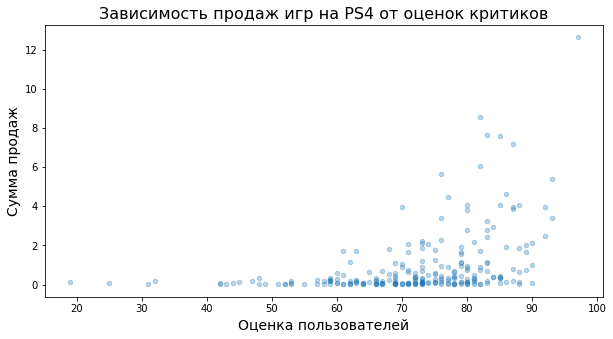

Коэффициент кореляции равен 0.40266141068104083


In [38]:
df.loc[df['platform'] == 'PS4'].plot(
    x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на PS4 от оценок критиков', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка пользователей', fontsize = 14) 
plt.show()
print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'PS4']['critic_score'].corr(
          df.loc[df['platform'] == 'PS4']['total_sales']))

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с суммами продаж, равную 0,40.

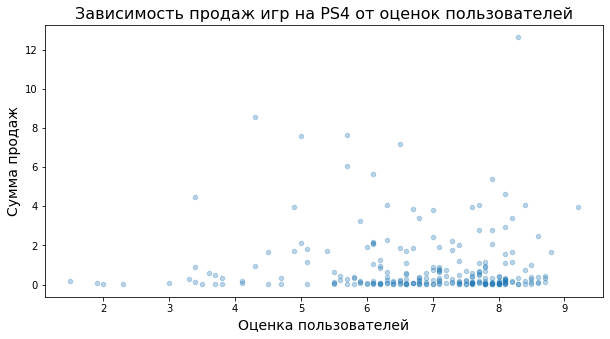

Коэффициент кореляции равен -0.03501047705575576


In [39]:
df.loc[df['platform'] == 'PS4'].plot(
    x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на PS4 от оценок пользователей', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка пользователей', fontsize = 14) 
plt.show()

print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'PS4']['user_score'].corr(
          df.loc[df['platform'] == 'PS4']['total_sales']))

Оценки пользователей корреляции с продажами не имеют.

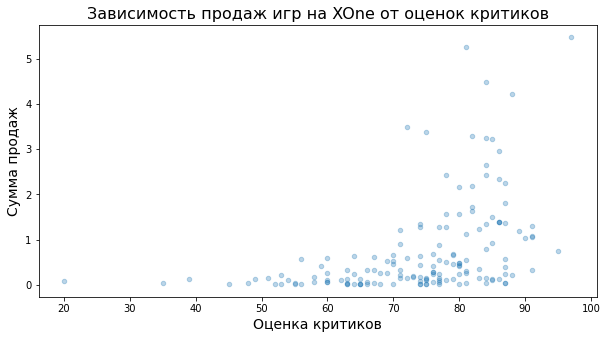

Коэффициент кореляции равен 0.42867694370333226


In [40]:
df.loc[df['platform'] == 'XOne'].plot(
    x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на XOne от оценок критиков', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка критиков', fontsize = 14) 
plt.show()

print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'XOne']['critic_score'].corr(
          df.loc[df['platform'] == 'XOne']['total_sales']))

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с суммами продаж на XOne, равную 0,42.

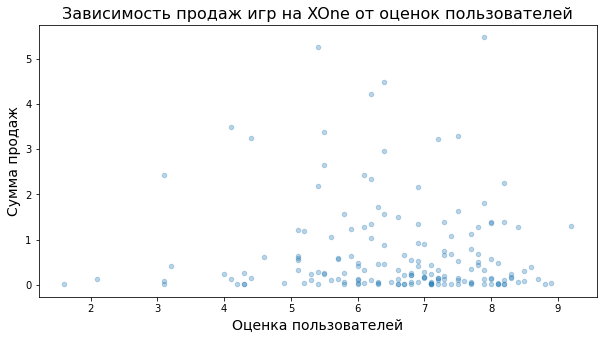

Коэффициент кореляции равен -0.07146551179048775


In [41]:
df.loc[df['platform'] == 'XOne'].plot(
    x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на XOne от оценок пользователей', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка пользователей', fontsize = 14) 
plt.show()

print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'XOne']['user_score'].corr(
          df.loc[df['platform'] == 'XOne']['total_sales']))

Оценки пользователей корреляции с продажами на XOne не имеют.

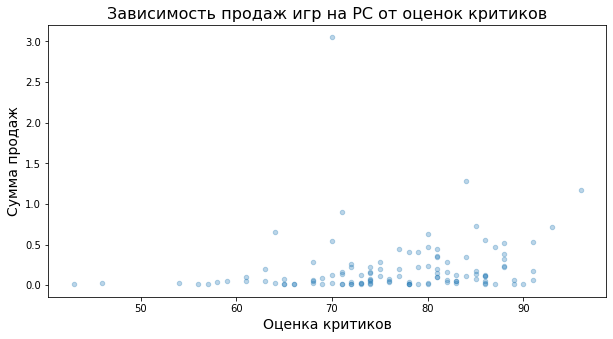

Коэффициент кореляции равен 0.17463413769350036


In [42]:
df.loc[df['platform'] == 'PC'].plot(
    x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на PC от оценок критиков', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка критиков', fontsize = 14) 
plt.show()

print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'PC']['critic_score'].corr(
          df.loc[df['platform'] == 'PC']['total_sales']))

Оценки критиков демонстрируют прямую, слабую корреляцию с суммами продаж на PC, равную 0,17.

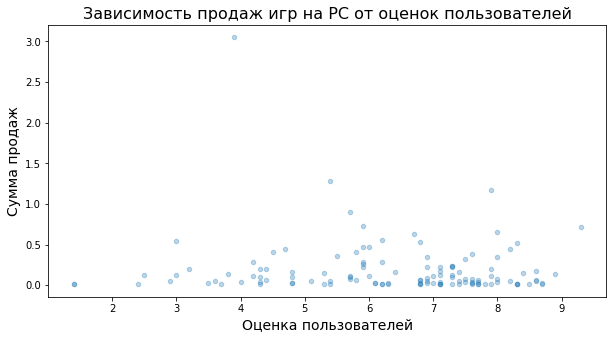

Коэффициент кореляции равен -0.07628975922388147


In [43]:
df.loc[df['platform'] == 'PC'].plot(
    x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(10,5))

plt.title('Зависимость продаж игр на PC от оценок пользователей', fontsize = 16)
plt.ylabel('Сумма продаж', fontsize = 14) 
plt.xlabel('Оценка пользователей', fontsize = 14) 
plt.show()

print('Коэффициент кореляции равен', 
      df.loc[df['platform'] == 'PC']['user_score'].corr(
          df.loc[df['platform'] == 'PC']['total_sales']))

Оценки пользователей корреляции с продажами на PC не имеют.

В целом, по итогу анализа влияния оценок критиков на продажи, мы наблюдаем прямую средне-слабую корреляцию. Корреляция между оценками пользователй и продажами нет.

Рассмотрим самые прибыльные и популярные жанры игр.

In [44]:
f = df.pivot_table(
        index='genre', values='total_sales', aggfunc=['count', 'sum', 'median'])
f.columns = ['count', 'sum', 'median']
f.sort_values(by='median')

,count,sum,median
genre,,,
Adventure,185,17.55,0.030
Puzzle,14,2.21,0.045
Strategy,37,3.96,0.060
Action,619,199.36,0.090
Misc,113,37.55,0.090
Racing,69,27.52,0.090
Simulation,44,13.13,0.100
Role-Playing,221,101.44,0.110
Fighting,60,28.22,0.125


Самое большое количество продаж у жанра экшн. 

Самый большое количество игр в жанре экшн, следом идут ролевые игры, и замыкает топ 3 приключения. Стоит отметить что игр в жанре экшн почти в три раза больше, чем ролевых. Это довольно большой отрыв. Далее распределение относительно с небольшими отрывами, а резкий спад идет после миксовых жанров. Так, жанр гонок отстает от миксовых жанров практически в два раза. 

По сумме продаж лидерство так же у экшена, следом идут шутеры и спорт. При этом нет такого большого отрыва первого от второго места как в популярности жанров. Сильно отстают миксовый жанр от ролевых игр, так ролевых было продано на 101,4, против 37,55. 

Медианно наиболее большие продажи у шутеров, почти в три раза меньше медианные продажи у спортивных игр, следом идут платформенные игры. У гонок, миксов и экшена одинаковыые продажи в 0,09.
Стратегии и пазлы явные аутайдеры нашего рейтинга.   

В большинстве своем все жанры популярны, однако стратегии, приключения и пазлы не так прибыльны и выделяются в общей массе отрицательно

На этом мы закончим исследовательский анализ данных. 

### Портрет пользователя каждого региона  <a id='id4'></a>

Посмотрим топ 5 платформ по трем регионам.

Начнем с Северной Америки.

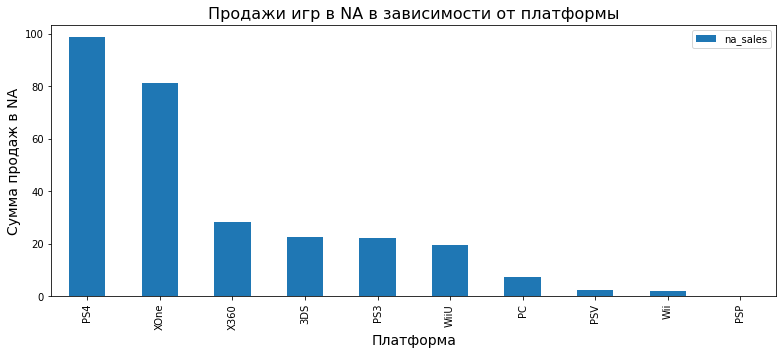

In [45]:
df.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(13,5))

plt.title('Продажи игр в NA в зависимости от платформы', fontsize = 16)
plt.ylabel('Сумма продаж в NA', fontsize = 14) 
plt.xlabel('Платформа', fontsize = 14) 
plt.show()

В топ 5 Северной Америки входят X360, PS3, Wii, PS4, XOne. Но как мы помним, три платформы из них прожили свой пик. Набирают популярность PS4 и XOne. В Америке как то больше любят X360, нежели чем PS3. Скорее всего это вызвано тем, что X360 производится Американской фирмой, в отличии от PS3. Но в тоже время PS4 популярнее XOne. 

Рассмотрим теперь Европу.

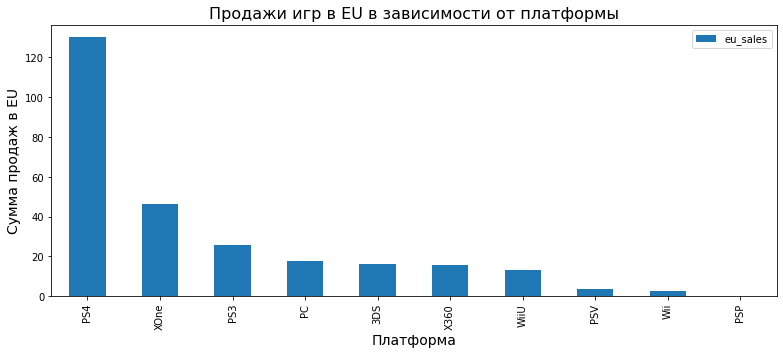

In [46]:
df.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(13,5))

plt.title('Продажи игр в EU в зависимости от платформы', fontsize = 16)
plt.ylabel('Сумма продаж в EU', fontsize = 14) 
plt.xlabel('Платформа', fontsize = 14) 
plt.show()

В Европе наибольшую популярность приобрела PS3, в отличии от Америки, а X360 на втором месте. Следом идет активно набирающая популярность PS4. Четвертое место занял персональный компьютер, примечательно, что в Америке он даже не вошел в топ 5. Замыкает пятерку лидеров Wii. В Америке она заняла 3 место.

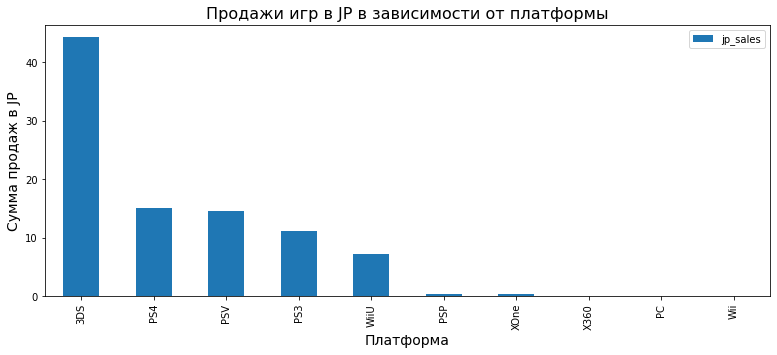

In [47]:
df.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(13,5))

plt.title('Продажи игр в JP в зависимости от платформы', fontsize = 16)
plt.ylabel('Сумма продаж в JP', fontsize = 14) 
plt.xlabel('Платформа', fontsize = 14) 
plt.show()

В  Японии на первом месте 3DS, следом идет уже знакомая нам PS3. Замыкает тройку лидеров PSP, следом идет DS и PSV. В Японии наибольшая популярность у портативных устройств, лишь PS3 вошла в топ 5 в данном регионе. Рынок Японии сильно отличается от двух других регионов.

Теперь посмотрим какие жанры популярны у трех изучаемых регионах.

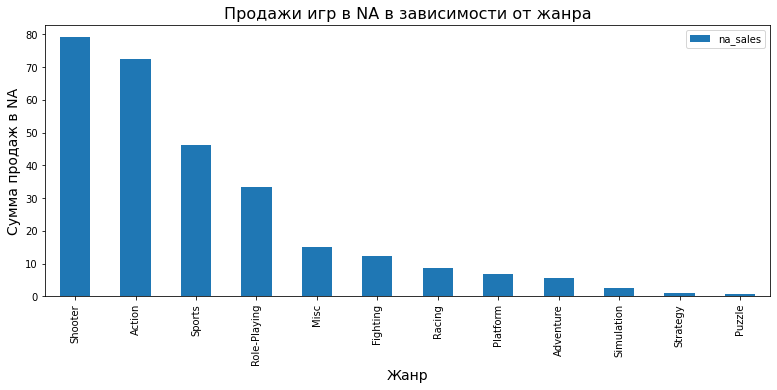

In [48]:
df.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(13,5))

plt.title('Продажи игр в NA в зависимости от жанра', fontsize = 16)
plt.ylabel('Сумма продаж в NA', fontsize = 14) 
plt.xlabel('Жанр', fontsize = 14) 
plt.show()

В Северной Америке популярны экшн, шутеры, спортивные игры, разные и ролевые игры. 

Посмотрим предпочтения игроков из Европы.

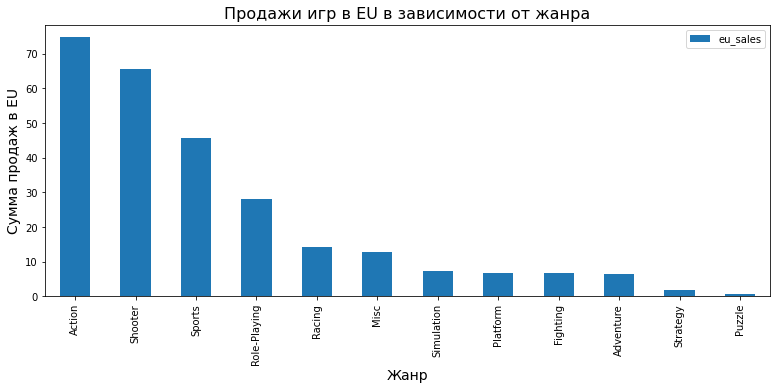

In [49]:
df.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(13,5));

plt.title('Продажи игр в EU в зависимости от жанра', fontsize = 16)
plt.ylabel('Сумма продаж в EU', fontsize = 14) 
plt.xlabel('Жанр', fontsize = 14) 
plt.show()

Вкусы европейских игроков практически полностью совпадают с американскими, единственным отличием являются последние два места: ролевый игры заняли 4, а разное 5. 

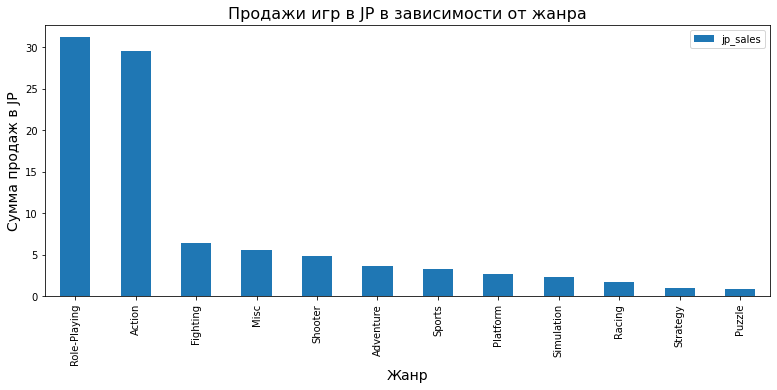

In [50]:
df.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(13,5));

plt.title('Продажи игр в JP в зависимости от жанра', fontsize = 16)
plt.ylabel('Сумма продаж в JP', fontsize = 14) 
plt.xlabel('Жанр', fontsize = 14) 
plt.show()

Ожидаемо японские игроки предпочли несколько другие жанры. С заметным преимуществом идут ролевые игры и экшн. В других регионах экшн на первом месте. Следом идут разное. Платформеры и приключения заняли 4 и 5 место, примерно с одинаковым количеством продаж.

Рассмотрим как повлиял возрастной рейтинг на продажи в разных регионах.

In [51]:
#заменим пропуски в рейтинге на unknown и сохраним в новом датафрейме
dffil = df
dffil['rating'] = dffil['rating'].fillna('unknown')
dffil['rating'].value_counts()

/tmp/ipykernel_349/135412817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffil['rating'] = dffil['rating'].fillna('unknown')


unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

В целом по датафрейму большинство игр без возрастного рейтинга. Посмотрим на продажи игр по рейтингу в разных регионах.

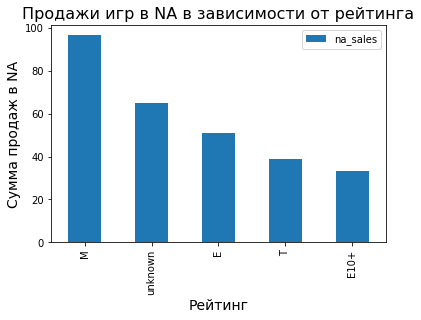

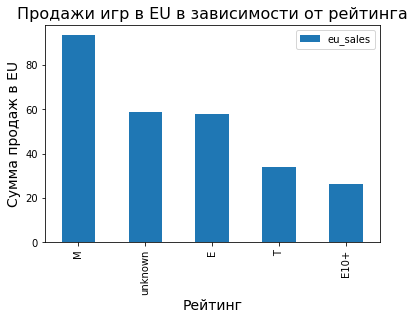

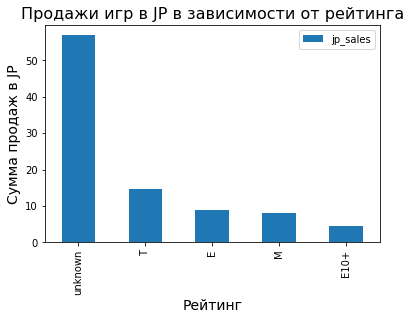

In [52]:
dffil.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'na_sales').plot(kind = 'bar')

plt.title('Продажи игр в NA в зависимости от рейтинга', fontsize = 16)
plt.ylabel('Сумма продаж в NA', fontsize = 14) 
plt.xlabel('Рейтинг', fontsize = 14) 
plt.show()

dffil.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'eu_sales').plot(kind = 'bar');

plt.title('Продажи игр в EU в зависимости от рейтинга', fontsize = 16)
plt.ylabel('Сумма продаж в EU', fontsize = 14) 
plt.xlabel('Рейтинг', fontsize = 14) 
plt.show()

dffil.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(
    ascending=False, by = 'jp_sales').plot(kind = 'bar');

plt.title('Продажи игр в JP в зависимости от рейтинга', fontsize = 16)
plt.ylabel('Сумма продаж в JP', fontsize = 14) 
plt.xlabel('Рейтинг', fontsize = 14) 
plt.show()

Северная Америка и Европа ожидаемо схожи в возрастных рейтингах. Удивительно, что игры без рейтинга занимают второе место, не смотря на то, что рейтинг выставляет американская компания. Видимо многие игры проходят мимо нее. В Японии же первое место со значительным отрывом занимают игры без рейтинга. Это объясняется тем, что, как уже говорилось выше, рейтинг выставляет американская компания. Скорее всего японский рынок слишком аутентичен, много игр выходят и пользуются огромным спросом только в этом регионе. Следом идет рейтинг Т, который в Европе и Америке на 4 месте. Рейтинг Е, во всех трех ригионах на 3 месте. 

### Проверка гипотез<a id='id5'></a>

Проверим средние пользовательские рейтинги платформ Xbox One и PC.

Н0 средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 средние пользовательские рейтинги платформ Xbox One и PC разные


In [53]:
xbox_one = df.loc[(df['platform'] == 'XOne') & (df['user_score']> 0)]['user_score']
pc = df.loc[(df['platform'] == 'PC') & (df['user_score']> 0)]['user_score']

alpha = 0.05 

results = st.ttest_ind(xbox_one, pc, equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13130164268727834
Не получилось отвергнуть нулевую гипотезу


Значение p-значение значительно больше 0,05, следовательно мы отвергаем альтернативную гипотезу.

Теперь проверим следующие гипотезы:

Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1: Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [54]:
action_score = df.loc[(df['genre'] == 'Action') & (df['user_score']> 0)]['user_score']
sports_score = df.loc[(df['genre'] == 'Sports') & (df['user_score']> 0)]['user_score']

alpha = 0.05 

results = st.ttest_ind(action_score, sports_score, equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4443510236261815e-13
Отвергаем нулевую гипотезу


Р-значение меньше альфы, отвергаем нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports отличаются

### Вывод <a id='id6'></a>

Наш датасет содержит данные с 1980 по 2016 года. В целом по рынку игр, мы можем сказать что был пик в 2010 году, потом настал спад. Предположиельно это вызвано кризисом 2008 года.

Много пропусков в данных с оценками как критиков, так и обычных игроков, так же пропуски есть в возрастном рейтинге. В некоторых играх были пропущены года выпуска. Это несколько затруднило исследование.

Мы выявили что платформы живут в среднем в районе 10 лет. Самая прибыльная за последние 36 лет стала PS2. Много платформ потеряли свою актуальность к 2016 году. Мы отфильтровали данные, оставив лишь актуальные. PS4 и XOne набирают свою популярность, на эти две платформы однозначно нужно сделать упор в продажах на 2017 год. Не очень популярна WiiU, если и продавать игры на нее, то следует делать это весьма ограниченно и только популярные жанры. Стабильно постоянны продажи игр на PC, но не приносят огромных продаж. На Японском рынке популярны 3DS вместе с PS4, XOne же вообще не популярны. Определили, что оценка критиков средне коррелирует с продажами, в отличии от оценок игроков. Поэтому следует просматривать оценки критиков в планировании продаж. По жанрам в Америке и Европе популярны шутеры, экшены и спорт. Япония и тут выделяется и предпочитает ролевые игры, экшены и файтинги. Абсолютными аутсайдерами во всех регионах оказались стратегии, приключения и пазлы. В зависимости от возрастного рейтинга Европа и Америка абсолютно похожи, вначале идет М, потом unknow, Е, Т и Е10+. В Японии, скорее всего, изза того, что компания по присваиванию рейтинга из Америки, лидирует с сильным отрывом unknow, следом идет Т, Е, М и Е10+.